## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# Spotify Playlist Curator


### Project participants:

* A. Sian Carey (mm16s4c@leeds.ac.uk)
* B. Emma Briggs (scelb@leeds.ac.uk)
* C. Sarah Smith (cm15sls@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

Our dataset is a Spotify dataset containing over 160,000 songs from 1921 to 2020. [Reference]
For each song in the dataset there are nineteen different features, split into four groups by the type of value they contain. Four of the features are categorical, for example the name of the song and the artist. Two of the features are dummies, for example whether the song has explicit content. With this feature a song has a zero here if it does not contain explicit content and a one if it does contain explicit content. The third type contains only one feature that does not fit anywhere else, partly because this feature is how all the other features are recognised as belonging to the same song within Spotify’s database. This feature is the Spotify song ID. The final type is where the majority of the features are, these are all the features that take numerical inputs. There are a range of features in here, from track length measured in milliseconds to danceability. As are a few other features, the danceability of a sing is defined by Spotify as a number between zero and one, where zero is no danceability and one is lots of danceability. This number is made by considering a range of features in the music including the tempo (speed) of the music, the strength of the beat and how regular the song is. However, we do not have access to these features so will just be using their combination found under danceability. This dataset is split between multiple files for ease of access, three of which we use within this project. The data files are all treated separately, however the results we gain from them are sometimes compared.

This data is fairly accurate. It has been collated from data available from Spotify developers, which is officially connected with the Spotify brand. Although it should be noted that due to the lengthy request process to see this data we cannot confirm that the data is the same as that take from Spotify developers. Another issue is that of Spotify itself, as our songs range from 1921 to 2020, however Spotify only started in 2008, which increases the chances of any songs from before 2008 having an incorrect year as there were not uploaded as they were released.






## Project Aim and Objectives (5 marks)

The overall aim of our project is to create An interactive program that allows users to search for Spotify songs, artists and genres by using certain features that are assigned to each song, such as how “dancey” they want the music to be or whether the song is explicit. Our project contains searching elements, where the inputted list of songs and related features is searched dependent on the user inputs and returns a list of songs and their artists that are within the boundaries requested by the user. It also contains some query representation, as a user can find genres they might enjoy, by inputting an artist they like. The final main element within our project is a visualisation aspect, users can see a graph outlining the energy, danceability and liveliness of the songs they have been returned. An aspect that we focus on throughout this project is ease of use, with clear and simple directions to the user that can be easily understood. It is also important that we have a robust user interface, so an incorrect input is highlighted, and the user is offered a search again instead of the system breaking. Whilst we will focus on a few user stories when reporting on our project it will also be useable for a much wider range of options.

### Specific Objective(s)

_You should chose and list __up to 3__ specific objectives. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person, but you may do more._

* __Objective 1:__ _Create a playlist that allows users to pick a feature and value they wish that feature to have within their returned playlist. Furthermore, allow them to remove explicit songs if required._
* __Objective 2:__ _Using pandas dataframe, recommend a list of genres with similar characteristics to a genre chosen by the user. Additionally, recommend a list of genres based on the user’s chosen artist._
* __Objective 3:__ _Improve the user experience and user input validation._

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

The relevant csv files are loaded into dataframes. For the playlist curation "data.csv" serves as the database and is loaded into the Data_DF dataframe. The dataframe is sorted based on various "features" suach as: valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness'or 'tempo' and to what value the user wants the feature to have (e.g., 40% energy). The user inputs the number of songs the want and if they would like to exclude explicit songs. The dataframe is then filtered and prints out the requested number of songs and their artists before the program terminates. 
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)


## Import Modules

In [1]:
import warnings            
import pandas
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import math
import matplotlib.pyplot as plt
import numpy as np

**get_csv_data** – Takes the location of a csv file and returns a dataframe of the csv file.

In [2]:
def get_csv_data(location):
    df = pandas.read_csv(location)
    return df

## Curate a Playlist

### Configuration Variables

In [14]:
#Define Dataframe.
Data_DF = get_csv_data('data.csv')
#Define list of possible features.
features_lst = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']
#Find total number of explicit song in the dataframe.
num_explicit = len(Data_DF[Data_DF['explicit'] !=0])

## Functions

**validate_user_input** – Takes a string (feature) and returns a float (feature_weight) which is the fraction/level of the requested feature. The functions ensures only the intended user input is accepted.  

In [15]:
def validate_user_input(feature):
    
    while True:
        try: 
            response = input("Please enter a whole number between 0 and 10 to indicate the level of {} in your playlist.\n \n0 = Minimum {} \n10 = Maximum {} \n \nPlease enter a whole number between 0 and 10: ".format(feature,feature,feature))
            print()
                                   
            if response not in ['0','1','2','3','4', '5', '6','7','8','9','10']:
                print("{} is not a whole number between 0 and 10! \nPlease input a whole number between 0 and 10!\n".format(response))
                continue
            break
        except ValueError:
            print("{} is not a whole number between 0 and 10! \nPlease input a whole number between 0 and 10!\n".format(response))
    
    print("You've selected {} out of 10, for {}.\n".format(response, feature))
    feature_weight = int(response)/10
    
    return feature_weight

**validate_selected_features** – Takes a string (feature) and returns a list (selected_features_lst). This function validates the user's selection and curates a list of all of the features the user selected.

In [35]:
def validate_selected_features(features):
    selected_features = list()
    
    while True:
        try: 
            response = input("Please select which feature you'd like to base your playlist suggestion on.\nIf you would like to select multiple features, please select the most important one first. Thank you.\n\
                             \n1 = {} \n2 = {} \n3 = {} \n4 = {} \n5 = {} \n6 = {} \n7 = {} \n8 = {} \n9 = {} \n10 = {} \n\nPlease enter one of the numbers shown above: ".format(features[0],features[1],features[2],features[3],features[4],features[5],features[6],features[7],features[8],features[9]))
            print()
                                   
            if response not in ['1','2','3','4', '5', '6','7','8','9','10']:
                print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
                continue
            selected_features.append(features[int(response)-1])
            print("You've selected {}.".format(features[int(response)-1]))
            print()
            while True:
                try:
                    again = input("Would you like to select another feature? \nPlease enter yes or no: ")
                    print()
                    
                    if again.lower() not in ['yes', 'no']:
                        print("{} is not an option! \nPlease answer with yes or no.\n".format(again))
                        continue
                    break
                except ValueError:
                    print("{} is not an option! \nPlease answer with yes or no.".format(again))
            if again.lower() == 'no':
                break
            else:
                continue
        except ValueError:
            print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
    
    print("Thank you. \n\nYou've selected:\n")
    print()
    
    selected_features_lst = list(dict.fromkeys(selected_features))
    for i in selected_features_lst:
        print(i)
    
    print()
    return selected_features_lst

**get_selected_feature_value** – Takes dataframe (df), string columnname (feature) and float (percent) value between 0 and 1 representing percent. Returns the selected percentage value of the feature e.g., 40% of 30000 where 40% is represented as 0.4.

In [17]:
def get_selected_feature_value(df, feature, percent):
    min_val = df[[feature]].min().item()
    max_val = df[[feature]].max().item()
   
    total = max_val - min_val
    feature_percent = total*percent
   
    feature_value = feature_percent+min_val
    
    return feature_value

**find_value_difference** – Takes dataframe (df), string columnname (feature) and float (value). Returns a dataframe, sorted by the difference between the float (value) and the numeric value of feature for each possible song in the dataframe.

In [18]:
def find_value_difference(df, feature, value):
    difference = []
    for i, row in df.iterrows():
        difference.append(abs(row[feature] - value))
    df['difference'] = difference
    sorted_df = df.sort_values(by=['difference'], ascending = True)
    del sorted_df['difference']
    
    return sorted_df

**return_songs_artist** – Takes a dataframe (df) prints out each song and it's artists in the dataframe.

In [19]:
def return_songs_artist(df):
    name_list = df['name'].values.tolist()
    artist_list = df['artists'].values.tolist()
  
    remove_char_lst = ["[", "]", "'"]
    print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')
    for i in range(len(name_list)):
        artist_str = artist_list[i]
        song_str = name_list[i]
        for char in remove_char_lst:
            artist_str = artist_str.replace(char, "")
            song_str = song_str.replace(char, "")
        artists = artist_str.split(", ")
        print(song_str, end = '\n')
        print()
        print('By:')
       
        for j in range(len(artists)):
            print(artists[j])
        print()
        print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')

**validate_num_songs** – Validates user input for the number of songs they would like to be recommended. The function ensures the input is a whole non negative number and no greater than the total possible number of songs in our csv file "data.csv".

In [20]:
def validate_num_songs():
    while True:
        try:
            value = input("Please enter the number of songs you would like with no spaces, periods or commas.\n\nPlease enter a number: ")
            print()
            
            if not isinstance(int(value), int):
                print("{} is not a whole number! \nPlease input an interger!\n".format(value))
                continue
            if int(value) < 0:
                print("{} is a negative number! \nPlease enter a positive number!\n".format(value))
                continue
            if int(value) == 0:
                print("{} is not an option! \nPlease a number greater than 1!\n".format(value))
                continue
            if int(value) > 170654:
                print("{} is too big! There are a maximum of 170,654 songs in our database.".format(value))
                continue
            break
        except ValueError:
            print("{} is not a number! \nPlease input a whole number!\n".format(value))
    
    num_songs = int(value)
    if num_songs == 1:
        print("You've requested {} song.\n".format(value))
        return num_songs
    else:
        print("You've requested {} songs.\n".format(value))
        return num_songs

**validate_explicit** – Validates user's input to either be 'yes'/'Yes' or 'no'/'No'. 

In [37]:
def validate_explicit():
    
    while True:
        try:
            ans = input("Would you like to exclude explicit songs? Please be aware that ansering yes may result in less song suggestions than requested.\n Please enter yes or no: ")
            print()
            if ans.lower() not in ['yes', 'no']:
                print("{} is not an option!\nPlease answer with yes or no.\n".format(ans))
                continue
            break
        except ValueError:
            print("{} is not an option!\nPlease answer with yes or no.".format(ans))
    
    if ans.lower() == 'yes':
        return True
    else:
        return False

### Curate a Playlist

## Main

Here The above functions are called to make a recommended playlist for the user. Try it out! :)

In [38]:
#User input
metrics = validate_selected_features(features_lst)
num_songs = validate_num_songs()
not_explicit = validate_explicit()

if num_songs == 170654 and not_explicit:
    print("You've selected the maximum number of songs in our database. By removing explicit songs you will receive less than 170,654 song suggestions.")

#If only one feature was selected.
if len(metrics) == 1:
    #User input
    feature_weight = validate_user_input(metrics[0])
    feature_range = get_selected_feature_value(Data_DF, metrics[0], feature_weight)
    print("Please wait a moment, it may take a few minutes to curate your song selection.\n")
    sorted_df = find_value_difference(Data_DF, metrics[0], feature_range)
    
    #Filtering dataframe based on if explicit songs should be removed or not.
    if num_songs == 170654 and not_explicit:
        none_explicit_df = sorted_df[sorted_df['explicit'] !=1]
        filtered_df = none_explicit_df[:]
    elif not_explicit:
        none_explicit_df = sorted_df[sorted_df['explicit'] !=1]
        filtered_df = none_explicit_df[:num_songs]
    else:
        filtered_df = sorted_df[:num_songs]
                
    print("Your recommended songs are:\n")
    #Curating playlist
    return_songs_artist(filtered_df)
    print("\nThank you for using our Spotify playlist curator!")
    
#If more than one feature was selected.
else:
    #Check number of requested songs.
    if num_songs == 170654:
        temp_num_songs = num_songs
    elif num_songs*len(metrics) > 170654:
        temp_num_songs = 170654
    #Make sure the dataframe will leave each extra songs in the dataframe as there are explicit songs so explicit songs can be removed.
    elif not_explicit and num_songs < num_explicit:
        temp_num_songs = (num_songs*len(metrics))+num_explicit
    else:
        temp_num_songs = num_songs*len(metrics)
        
    multiple_feat_df = Data_DF
    #Sort dataframe based on selected features.
    for i in metrics:
        feature_weight = validate_user_input(i)
        feature_range = get_selected_feature_value(multiple_feat_df, i, feature_weight)
        print("Please wait, this may take a while.\n")
        print()
        sorted_df = find_value_difference(multiple_feat_df, i, feature_range)
        multiple_feat_df = sorted_df[:temp_num_songs]
        #temp_num_songs is used to reduce the size of the dataframe at each iteration.
        temp_num_songs = temp_num_songs - len(metrics)
    
    #Filtering dataframe based on if explicit songs should be removed or not.
    if not_explicit:
        none_explicit_df = multiple_feat_df[multiple_feat_df['explicit'] !=1]
        filtered_df = none_explicit_df[:num_songs]
    else:
        filtered_df = multiple_feat_df[:num_songs]
                
    print("Your recommended songs are:\n")
    #Curating playlist
    return_songs_artist(filtered_df)
    print("\nThank you for using our Spotify playlist curator!")

Please select which feature you'd like to base your playlist suggestion on.
If you would like to select multiple features, please select the most important one first. Thank you.
                             
1 = valence 
2 = acousticness 
3 = danceability 
4 = energy 
5 = instrumentalness 
6 = liveness 
7 = loudness 
8 = popularity 
9 = speechiness 
10 = tempo 

Please enter one of the numbers shown above: energy

energy is not an option! 
Please input a whole number between 1 and 10!
Please select which feature you'd like to base your playlist suggestion on.
If you would like to select multiple features, please select the most important one first. Thank you.
                             
1 = valence 
2 = acousticness 
3 = danceability 
4 = energy 
5 = instrumentalness 
6 = liveness 
7 = loudness 
8 = popularity 
9 = speechiness 
10 = tempo 

Please enter one of the numbers shown above: 4.

4. is not an option! 
Please input a whole number between 1 and 10!
Please select which feature 

The following code will show a visual representation of the songs chosen above.

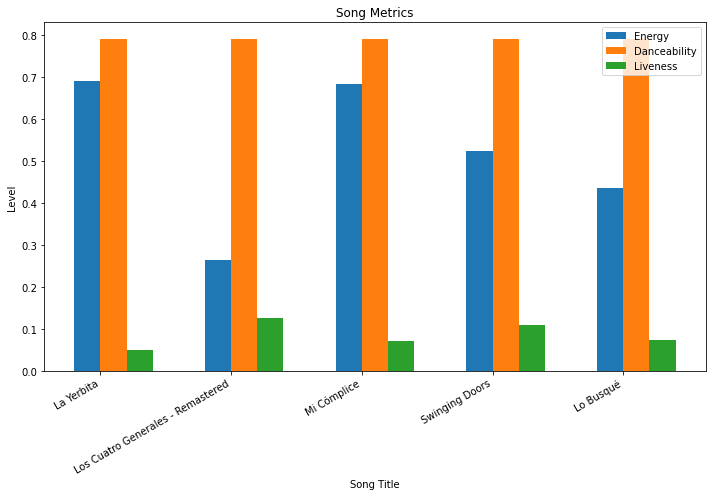

In [34]:
small_DF = filtered_df.loc[filtered_df.index[0:num_songs]]

labels = small_DF['name'] #labels of the bars
energy_levels = small_DF['energy'] #energy levels
dance_levels= small_DF['danceability'] #dance levels
liveness_levels = small_DF['liveness'] #liveness levels

x = np.arange(len(labels))  #get values for interval
bar_w = 0.2  # set width of bars

f, ax = plt.subplots(figsize = (10,7)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, energy_levels, bar_w, label='Energy') #set the bars
bar2 = ax.bar(x + bar_w/2, dance_levels, bar_w, label='Danceability')
bar3 = ax.bar(x + 3*(bar_w/2), liveness_levels, bar_w, label='Liveness')

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Song Title')
ax.set_title('Song Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.show() #display the graph

## Genre Recommendations by Suggested Feature

In [3]:
genre_DF = get_csv_data("data_by_genres.csv")

First for some pre-processing of the data frame

In [4]:
#get abs val of loudness column as all loudness values are negative 
genre_DF['loudness'] = genre_DF['loudness'].abs()
#remove the empty genre
genre_DF = genre_DF[genre_DF['genres'] != ('[]' or ' ' or '')]
#keep track of original genres
genre_df = genre_DF.copy(deep=True)
#now make genres insensitive to spaces for user input
genre_DF['genres'] = genre_DF['genres'].str.replace(' ', '')
# Restrict DF to desired characteristics for comparison
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
c_df = genre_DF[columns] 
#normalise columns using min-max normalisation
genre_norm = (c_df-c_df.min())/(c_df.max()-c_df.min())
genre_norm.fillna(0, inplace=True) #automatically set na vals to 0

**normal_genre** A function that returns the normalised vector for the given genre

In [5]:
def normal_genre(genre):
    given_g_norm = genre_norm[genre_DF["genres"] == genre]
    return given_g_norm

**euclidean_distance** A simple euclidean distance function to calculate the distance regarding all characteristics

In [6]:
def euclidean_distance(row):
    given_g_norm = normal_genre(genre)
    v = 0
    for c in columns:
        v += (row[c] - given_g_norm[c]) ** 2
    return math.sqrt(v)

**similarity** A function that sorts genres by similarity to input genre

In [7]:
def similarity():
# Find the similarity index for each other genre
    genre_n_similarity = genre_norm.apply(euclidean_distance, axis=1)
#Sort by ascending value: 0 represents exact similarity
    genre_n_similarity = genre_n_similarity.sort_values(ascending= True)
    return genre_n_similarity

**index_list** Get the index values of most similar genres with length equal to a given number

In [8]:
def index_list(no_given):
    indexlist = []
    sim_byindex = genre_n_similarity[1:no_given+1].index
    for i in range(0, no_given):
        indexlist.append(int(sim_byindex[i]))
    return indexlist

**select_no_genres** Function to take user input as no. of genres to recommend

In [9]:
def select_no_genres():
    f1 = input("Please select the number of genres you would like: ")
    while True:
        if not f1.isnumeric():
            f1 = input("Please enter a positive numeric value: ")
        else:
            break
    f1 = int(f1)        
    return f1

**select_genre** Function to take user input as selected genre

In [10]:
def select_genre():
    genre_in = input("Please enter a genre to receive recommendations: ")
    genre_in = genre_in.replace(" ", "").lower()
    while True:
        if genre_in not in genre_DF['genres'].tolist():
            genre_in = input("Please enter a valid genre: ")
            genre_in = genre_in.replace(" ", "").lower()
        else:
            break   
    return genre_in

### Find Genre Recommendations

In [11]:
genre = select_genre()
no_given = select_no_genres()

genre_n_similarity = similarity()
genre_to_display = genre_df['genres'][genre_n_similarity.index[0]]
indexlist = index_list(no_given)
list_of_genres = genre_df.loc[indexlist]['genres'].tolist()

print()
print('Here are ' + str(no_given) + ' genres similar to ' + str(genre_to_display.title()) + ' you might like: ')
print()
print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')
for j in range(len(list_of_genres)):
    print('Genre ' + str(j+1) + ": " + list_of_genres[j].title())
    print()
    print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')

Please enter a genre to receive recommendations: TECHNO
Please select the number of genres you would like: 5

Here are 5 genres similar to Techno you might like: 

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 1: Japanese Dream Pop

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 2: Proto-Techno

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 3: Float House

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 4: Dusseldorf Electronic

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 5: Eastern Bloc Groove

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


### Compare Genres given above

**select_metric** Function for user to select which metric to compare given genres by

In [12]:
def select_metric(features):
    
    while True:
        try: 
            response = input("Please enter a metric to compare genres by.\n\
                             \n1 = {} \n2 = {} \n3 = {} \n4 = {} \n5 = {} \n6 = {} \n7 = {} \n8 = {} \n9 = {} \n10 = {} \n\nPlease enter one of the number above: ".format(features[0],features[1],features[2],features[3],features[4],features[5],features[6],features[7],features[8],features[9]))
            print()
                                   
            if response not in ['1','2','3','4', '5', '6','7','8','9','10']:
                print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
                continue
            break
            
        except ValueError:
            print("{} is not an option! \nPlease input a whole number between 1 and 10!".format(response))
    print("You've selected {}.".format(features[int(response)-1]))
    print()
            

    return features[int(response)-1]

### Pick a Metric to Compare Genres with

In [13]:
columns.insert(0,'genres')

newindexlist = []
sim_byindex = genre_n_similarity[0:no_given].index
for i in range(0, no_given):
    newindexlist.append(int(sim_byindex[i]))
df_display = genre_df.loc[newindexlist][columns]
features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']
metric = select_metric(features)
df_display = df_display.sort_values(by=[metric], ascending=True)

Please enter a metric to compare genres by.
                             
1 = valence 
2 = acousticness 
3 = danceability 
4 = energy 
5 = instrumentalness 
6 = liveness 
7 = loudness 
8 = popularity 
9 = speechiness 
10 = tempo 

Please enter one of the number above: 4

You've selected energy.



Plot the above information in a bar chart

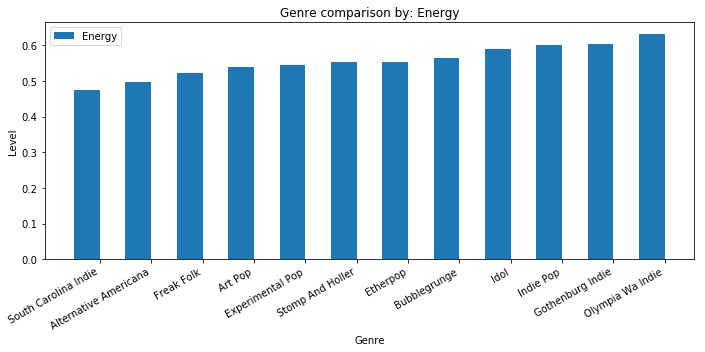

In [15]:
labels = [x.title() for x in df_display['genres']] #labels of the bars
value = df_display[metric] #display chosen metric

x = np.arange(len(labels))  #get values for interval
bar_w = 0.5  # set width of bars

f, ax = plt.subplots(figsize = (10,5)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, value, bar_w, label=metric.title()) #set the bars

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Genre')
ax.set_title('Genre comparison by: ' + metric.title())
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.savefig('genreComparison.png',dpi=400)
plt.show() #display the graph

## Suggested Genre by Artist

In [17]:
AG_DF = get_csv_data("data_w_genres.csv")

Pre-processing DF to allow for case and space insensitivity

In [18]:
#keep track of original artist names
ag_df = AG_DF.copy(deep=True)
#now make artists case and space insensitive for user input
AG_DF['artists'] = AG_DF['artists'].str.replace(' ', '')
AG_DF['artists'] = [x.lower() for x in AG_DF['artists']]
artist_list = AG_DF['artists'].tolist()

**select_artist** Function to allow user to select artist for input

In [19]:
def select_artist():
    artist_in = input("Please enter an artist to receive recommended genres: ")
    artist_in = artist_in.replace(" ", "").lower()
    while True:
        if artist_in not in artist_list:
            artist_in = input("Please enter a verified Spotify artist: ")
            artist_in = artist_in.replace(" ", "").lower()
        else:
            break   
    return artist_in

**get_genres** Function that returns a list of genres associated with an artist

In [20]:
def get_genres(artist):
    genres = []
    i = artist_list.index(artist)
    if AG_DF['genres'][i] == '[]':
        return False
    return AG_DF['genres'][i]

### Find Genre from Artist Choice

In [21]:
artist = select_artist()
artist_display = ag_df['artists'][artist_list.index(artist)]

if get_genres(artist) == False:
    print('Sorry, there are no established genres associated with this artist')
else:
    print()
    print('If you like ' + artist_display + ' we recommend the following genres: ')
    remove_char_lst = ["[", "]", "'"]
    genre_list = get_genres(artist)
    
    for char in remove_char_lst:
        genre_list = genre_list.replace(char, "")
    genres = genre_list.split(", ")
    print()
    print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')
    for j in range(len(genres)):
        print('Genre ' + str(j+1) + ": " + genres[j].title())
        print()
        print('–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––')

Please enter an artist to receive recommended genres: radiohead

If you like Radiohead we recommend the following genres: 

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 1: Alternative Rock

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 2: Art Rock

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 3: Melancholia

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 4: Oxford Indie

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 5: Permanent Wave

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Genre 6: Rock

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––


# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

The “curating a playlist” section outputs a list of songs most similar to the users inputted value and feature, as we required. For example, when the user asks for the 3 songs most close to having a 5 in danceability the top 3 songs that are closest to a 5 in danceability will have their song name and artist printed.

This was done by first asking the user to input the feature they wished to create a playlist around and then asking for a number that should be assigned to that feature, for example you could choose danceability and the number 10 if you wished to have very danceable songs. This number was then compared to the feature value for each song in the dataframe, and the dataframe reordered so that songs with feature value closer to the chosen number were at the top. It is also possible for the user to specify how many songs they would like returned. This request is completed by taking that number of songs from the top of the dataframe. 

However, due to the number of songs in the original database if the user asks for a small number of songs or only specifies a small number of features it may be that they miss many songs that come within the limits they have set. Thereby, possibly missing songs that they would enjoy on their playlist.


### Visualisation
The following bar chart shows the results of an input that requires the danceability feature with a value of 8 and the tempo function with a value of 1, asking for 5 songs and excluding explicit ones. As you can see, the danceability of all these songs are of a very similar value as requested. However, the energy and liveness differ slightly. Please note, this is the same bar chart as shown in the code above that allows the user to have a visual representation of their playlist.

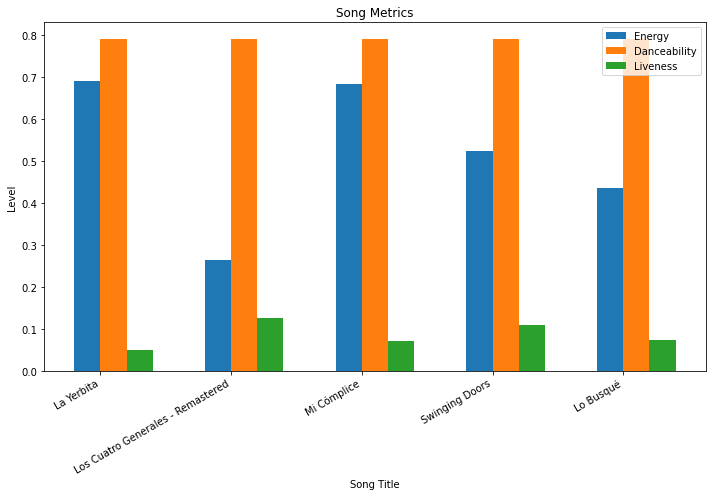

In [36]:
small_DF = filtered_df.loc[filtered_df.index[0:num_songs]]

labels = small_DF['name'] #labels of the bars
energy_levels = small_DF['energy'] #energy levels
dance_levels= small_DF['danceability'] #dance levels
liveness_levels = small_DF['liveness'] #liveness levels

x = np.arange(len(labels))  #get values for interval
bar_w = 0.2  # set width of bars

f, ax = plt.subplots(figsize = (10,7)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, energy_levels, bar_w, label='Energy') #set the bars
bar2 = ax.bar(x + bar_w/2, dance_levels, bar_w, label='Danceability')
bar3 = ax.bar(x + 3*(bar_w/2), liveness_levels, bar_w, label='Liveness')

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Song Title')
ax.set_title('Song Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.show() #display the graph

## Objective 2 
### Explanation of Results

The ‘genre recommendations’ section successfully returns a list of chosen length of similar genres to the genre input by the user. On the whole, the genres returned appear very similar to the input genre. For example, when ‘techno’ is input, the output is (for 5 genres):

![title](genre_recs_from_genre.png)

This was achieved by calculating a similarity index (where 0 is exactly the same and the further away from 0, the less similar) for each element in the genre column of the dataframe (using normalised vectors for each row and using Euclidean distance to represent the similarity to the chosen genre over all the characteristics). Characteristics include aspects such as ‘danceability’, ‘tempo’ and ‘acousticness.’ Therefore, genres with similar characteristics should be similar. 
The genres were then sorted by similarity value (to the chosen genre) ascending and the first n elements retrieved to give the most similar n genres (where n is the user’s desired number of genres).

The limitation of this is that the recommended genres probably won’t be exactly the most similar genres, as only the characteristics present in the data.csv file were used to compare genres, when in fact, genres could be associated with many more characteristics (for example, artists weren’t included in this data file and all the genres associated with one artist are often similar). Nonetheless, it is sufficiently successful in achieving the objective.

Similarly, for the ‘genre recommendations by artist’ section, the user is recommended all the genres associated with their chosen artist. This is done simply by using a pandas dataframe and retrieving the ‘genres’ element at the same index as the given artist. For example, when ‘Radiohead’ is input, the output is as follows:

![title](genre_recs_from_artist.png)

### Visualisation

After the user had been recommended a series of genres, the user was then prompted to select a metric by which to compare the genres from the available metrics in the dataframe. Matplotlib was used to display the comparison between the metric values for each of the genres as a bar chart (with each bar indicating a separate genre) including the original genre so that the user could see how that compares with the recommended genres. The metric to compare by is tailored to the user input. The genres are ordered by value ascending in terms of the selected metric so that the user can visualise their ranking.

So, for example, choosing ‘energy’ for the 12 genres similar to ‘Art Pop’ produces the following:

![title](genreComparison.png)

## Objective 3 – Improve User Experience and Input Validation.
### Explanation of Results

Having implemented the desired features, we wanted to make the user experience a bit better and to try and avoid invalid inputs when using the system. The overall aim was to improve the usability of the program and the user experience which can be defined by Jakob Nielsen's "10 Usability Heuristics" (found here: https://www.nngroup.com/articles/ten-usability-heuristics/). The main heuristics improved in this section were flexibility, user control, and error prevention, diagnosis and recovery. Although not all heuristics were achieved to the greatest extent possible, there was a noticeable increase in usability. For example, the output was formatted to make the curated playlist/song suggestions more legible instead of outputing a list. What the user is expected to input and where has been addressed and appropriate error messages have been added to inform the user if their input was invalid. The user is then asked to re-enter their input with a valid input. A message "Please wait, this may take a while." has been added to the systems where there is a considerable lag between the user input and the next.

### Visualisation

Please see below an example of perfect user behaviour and some imperfect user behavour. Not all options and fail safes are shown here as displaying every possible type of input would be too long to demonstrate here. So please feel free to use the notebook provided to try and break the program.

### Perfect use

![title](perfectuse1.png)

![title](perfectuse2.png)

### Imperfect use

![title](imperfectuse1.png)

![title](imperfectuse2.png)

# Conclusion 


### Acheivements
As we had anticipated, we were able to successfully return a curated Spotify playlist based on the user’s desired level of a certain characteristic (such as ‘danceability’). When we retrieved genre recommendations based on a selected genre by comparing over the set of characteristics that were available, the genres did appear very similar to that of the input genre (even if they were perhaps not the most similar genres). We also successfully retrieved a set of genres associated with a user’s favourite artist. 

### Limitations

We were limited in that we didn’t have access to one single database with all the necessary information in: for example, the database that displayed information by genre didn’t have any associated songs or artists with that genre, and so we were limited in what we could select easily based on a genre. In the database with artist data, every artist was associated with multiple genres and so it would not have been trivial to select a genre and return a list of associated artists. Given the time limitations, we did not achieve this. 

### Future Work

In the future, we would expand the functionality of the playlist, artist and genre recommendations by recommending artists based on genres, and allowing the user to personally select what kind of recommendations they would like. 
Once we were able to give artist recommendations, we could then return a playlist of a handful of songs by those artists, so that the user would only have to input a single genre or artist and would receive a specially curated playlist. This would be done by matching up the indexes of the dataframe in which the genre or artist appears and then retrieving songs with the same indexes. Alternatively, we would allow multiple inputs of genres or artists as a list so that the user could receive a recommendation which is even more specific to their tastes. This would be achieved by retrieving multiple sets of recommendations (as performed individually in objective 2) and prioritising those which are duplicates. 


# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [56]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60